In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df.head(10)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,...,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,7/10/19 17:56,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,...,IMPROPER BACKING,2,0.0,0.0,0.0,0.0,0.0,17,4,7
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6/30/17 16:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,...,FAILING TO YIELD RIGHT-OF-WAY,2,0.0,0.0,0.0,0.0,0.0,16,6,6
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,7/10/20 10:25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,...,FAILING TO YIELD RIGHT-OF-WAY,3,0.0,0.0,0.0,0.0,0.0,10,6,7
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,7/11/20 1:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,1,7,7
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,7/8/20 14:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,DRY,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,14,4,7
5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,3/21/19 22:50,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,DRY,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,22,5,3
6,0126747fc9ffc0edc9a38abb83d80034f897db0f739eef...,3/26/18 14:23,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,14,2,3
7,f636d4a51a88015ac89031159b1f1952b8d92e49d11aeb...,7/10/20 22:20,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,DRY,...,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2,1.0,0.0,0.0,1.0,0.0,22,6,7
8,76aabcf7c2219a5c90259c96fe94b33834ddb53e0dbcd3...,7/9/20 17:06,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,UNKNOWN,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,17,5,7
9,9c974548026c1b962569040bd8fa08ae643ffc28c15ebd...,6/29/20 17:55,10,OTHER,NO CONTROLS,CLOUDY/OVERCAST,DAWN,PARKED MOTOR VEHICLE,PARKING LOT,DRY,...,IMPROPER BACKING,2,0.0,0.0,0.0,0.0,0.0,17,2,6


# 1. Handling missing values and extra attributes.

#### Finding number of null values in every attribute.

In [3]:
no_of_missing = df.isna().sum()
print(no_of_missing)

CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
INTERSECTION_RELATED_I           372958
NOT_RIGHT_OF_WAY                 458971
HIT_AND_RUN_I                    340155
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
NUM_UNITS                             0
INJURIES_TOTAL                      964
INJURIES_FATAL                      964
INJURIES_INCAPACITATING             964
INJURIES_NON_INCAPACITATING         964
INJURIES_REPORTED_NOT_EVIDENT       964
CRASH_HOUR                            0


#### Finding percentage of null values in every attribute.

In [4]:
percent_of_missing = df.isnull().sum() * 100 / len(df)
print(percent_of_missing)

CRASH_RECORD_ID                   0.000000
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           77.437747
NOT_RIGHT_OF_WAY                 95.296736
HIT_AND_RUN_I                    70.626818
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
NUM_UNITS                         0.000000
INJURIES_TOTAL                    0.200157
INJURIES_FATAL                    0.200157
INJURIES_INCAPACITATING           0.200157
INJURIES_NON_INCAPACITATING       0.200157
INJURIES_RE

#### For columns with object values replace missing values with 'Not_Available'


In [5]:
df.dtypes

CRASH_RECORD_ID                   object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY                  object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
NUM_UNITS                          int64
INJURIES_TOTAL                   float64
INJURIES_FATAL                   float64
INJURIES_INCAPACITATING          float64
INJURIES_NON_INCAPACITATING      float64
INJURIES_REPORTED_NOT_EVIDENT    float64
CRASH_HOUR      

In [6]:
df['INTERSECTION_RELATED_I'].fillna('Not_Available',inplace =True)
df['NOT_RIGHT_OF_WAY'].fillna('Not_Available',inplace =True)
df['HIT_AND_RUN_I'].fillna('Not_Available',inplace =True)

#### For columns with float values replace missing values with mode of the column

In [7]:
df['INJURIES_TOTAL'].fillna(df['INJURIES_TOTAL'].mode()[0], inplace = True)
df['INJURIES_FATAL'].fillna(df['INJURIES_FATAL'].mode()[0], inplace = True)
df['INJURIES_INCAPACITATING'].fillna(df['INJURIES_INCAPACITATING'].mode()[0], inplace = True)
df['INJURIES_NON_INCAPACITATING'].fillna(df['INJURIES_NON_INCAPACITATING'].mode()[0], inplace = True)
df['INJURIES_REPORTED_NOT_EVIDENT'].fillna(df['INJURIES_REPORTED_NOT_EVIDENT'].mode()[0], inplace = True)

In [8]:
no_missing= df.isna().sum()
print(no_missing)

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY                 0
HIT_AND_RUN_I                    0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
NUM_UNITS                        0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH                      0
dtype: int64


# 2. Breaking some attributes into multiple useful attributes.

In [9]:
#extracting crash year from column "CRASH_DATE"
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year

In [10]:
#Breaking column "DATE_POLICE_NOTIFIED" into date,time,hour and minute attributes
df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED'])
df['NOTIFIED_DATE'] = df['DATE_POLICE_NOTIFIED'].dt.date 
df['NOTIFIED_TIME'] = df['DATE_POLICE_NOTIFIED'].dt.time 
df['NOTIFIED_HOUR'] = df['DATE_POLICE_NOTIFIED'].dt.hour 
df['NOTIFIED_MINUTE'] = df['DATE_POLICE_NOTIFIED'].dt.minute

In [11]:
#Labelling integer values in column "CRASH_MONTH" with respective month names
df['CRASH_MONTH'] = df['CRASH_MONTH'].apply(lambda x : 'January' if x==1
                                                else('February' if x==2 
                                                else('March' if x==3 
                                                else('April' if x==4 
                                                else('May' if x==5 
                                                else('June' if x==6 
                                                else('July' if x==7 
                                                else('August' if x==8 
                                                else('September' if x==9 
                                                else('October' if x==10 
                                                else('November' if x==11 
                                                else('December' if x==12 else 'invalid'))))))))))))
print(df['CRASH_MONTH'].head(10))

0     July
1     June
2     July
3     July
4     July
5    March
6    March
7     July
8     July
9     June
Name: CRASH_MONTH, dtype: object


In [12]:
#Labelling integer values in column "CRASH_WEEK" with respective week names
df['CRASH_DAY_OF_WEEK'] = df['CRASH_DAY_OF_WEEK'].apply(lambda x : 'Monday' if x==1
                                                            else('Tuesday' if x==2 
                                                            else('Wednesday' if x==3 
                                                            else('Thursday' if x==4 
                                                            else('Friday' if x==5 
                                                            else('Saturday' if x==6 
                                                            else('Sunday' if x==7  else 'invalid')))))))
print(df['CRASH_DAY_OF_WEEK'].head(10))

0    Thursday
1    Saturday
2    Saturday
3      Sunday
4    Thursday
5      Friday
6     Tuesday
7    Saturday
8      Friday
9     Tuesday
Name: CRASH_DAY_OF_WEEK, dtype: object


In [13]:
#Based on crash hour create day and night attribute
df['CRASH_DAY/NIGHT'] = df['CRASH_HOUR'].apply(lambda x :'Day' if (x >= 8) and (x <= 18) else 'Night')
print(df['CRASH_DAY/NIGHT'].head(10))

0      Day
1      Day
2      Day
3    Night
4      Day
5    Night
6      Day
7    Night
8      Day
9      Day
Name: CRASH_DAY/NIGHT, dtype: object


In [14]:
#Based month create season attribute
df['CRASH_SEASON'] = df['CRASH_MONTH'].apply(lambda x : 'Winter' if x == 'December'
                                                else('Winter' if x == 'January' 
                                                else('Winter' if x == 'February' 
                                                else('Spring' if x == 'March'
                                                else('Spring' if x == 'April' 
                                                else('Spring' if x=='May' 
                                                else('Summer' if x=='June' 
                                                else('Summer' if x=='July' 
                                                else('Summer' if x=='August' 
                                                else('Fall' if x=='September' 
                                                else('Fall' if x=='October' 
                                                else('Fall' if x=='November' else 'invalid'))))))))))))
df['CRASH_SEASON'].head(10)

0    Summer
1    Summer
2    Summer
3    Summer
4    Summer
5    Spring
6    Spring
7    Summer
8    Summer
9    Summer
Name: CRASH_SEASON, dtype: object

# 3.  Insights on relation between crashes and day time attributes

CRASH_SEASON
Fall      132732
Spring    102120
Summer    120098
Winter    126673
dtype: int64

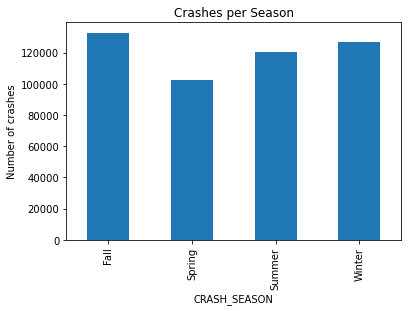

In [15]:
plot1 = df.groupby("CRASH_SEASON").size() 
plt.ylabel("Number of crashes")
plt.title("Crashes per Season")
plot1.plot.bar();
plot1

Crashes are frequent during the fall season

CRASH_DAY_OF_WEEK
Friday       69166
Monday       58214
Saturday     78314
Sunday       71223
Thursday     68599
Tuesday      66887
Wednesday    69220
dtype: int64

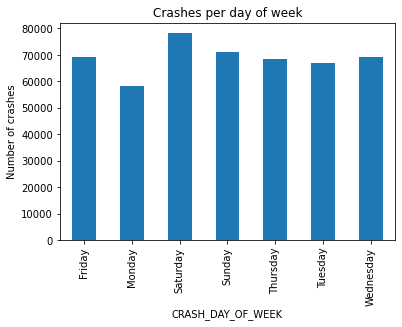

In [16]:
plot2 = df.groupby("CRASH_DAY_OF_WEEK").size()
plt.ylabel("Number of crashes")
plt.title("Crashes per day of week")
plot2.plot.bar();
plot2

Crashes are frequent during the weekends

CRASH_DAY/NIGHT
Day      326173
Night    155450
dtype: int64

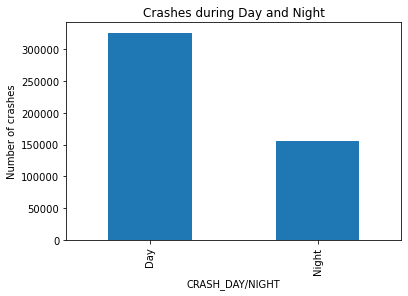

In [17]:
plot3 = df.groupby("CRASH_DAY/NIGHT").size() 
plt.ylabel("Number of crashes")
plt.title("Crashes during Day and Night")
plot3.plot.bar();
plot3

Crashes are frequent during the day

LIGHTING_CONDITION
DARKNESS                   24705
DARKNESS, LIGHTED ROAD    104033
DAWN                        8381
DAYLIGHT                  312024
DUSK                       14880
UNKNOWN                    17600
dtype: int64

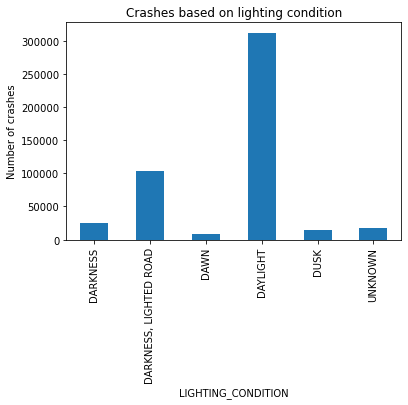

In [18]:
plot4 = df.groupby("LIGHTING_CONDITION").size() 
plt.ylabel("Number of crashes")
plt.title("Crashes based on lighting condition")
plot4.plot.bar();
plot4

Crashes are frequent during the day light lighting conditions

WEATHER_CONDITION
BLOWING SAND, SOIL, DIRT         2
BLOWING SNOW                   161
CLEAR                       379417
CLOUDY/OVERCAST              14410
FOG/SMOKE/HAZE                 824
FREEZING RAIN/DRIZZLE          574
OTHER                         1564
RAIN                         42770
SEVERE CROSS WIND GATE          98
SLEET/HAIL                     716
SNOW                         20114
UNKNOWN                      20973
dtype: int64

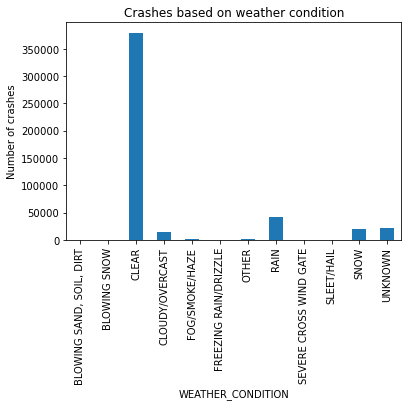

In [19]:
plot5 = df.groupby("WEATHER_CONDITION").size() 
plt.ylabel("Number of crashes")
plt.title("Crashes based on weather condition")
plot5.plot.bar();
plot5

Crashes are frequent when the weather conditions indicate clear skies and least when there is blowing sand, soil and dust

CRASH_MONTH
April        31451
March        33761
May          36908
June         38035
July         40157
February     40897
January      41513
August       41906
November     42913
September    43301
December     44263
October      46518
dtype: int64

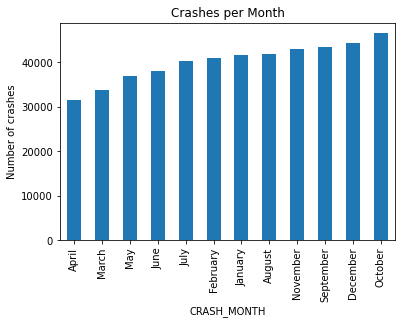

In [20]:
plot6 = df.groupby("CRASH_MONTH").size().sort_values(ascending = True) 
plt.ylabel("Number of crashes")
plt.title("Crashes per Month")
plot6.plot.bar();
plot6

Crashes are frequent in the month of October and least during the month of April

# 4. Trend in number of deadly crashes over the years

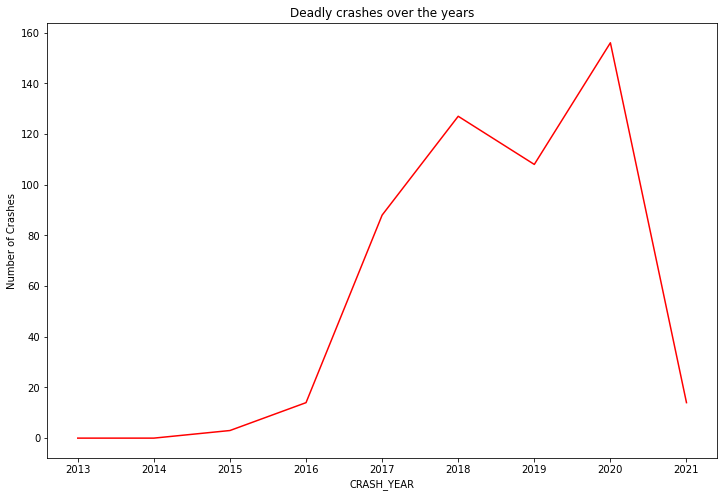

In [21]:
deadly_crashes = df.groupby("CRASH_YEAR").sum()['INJURIES_FATAL']
plt.ylabel("Number of Crashes")
plt.title("Deadly crashes over the years")
deadly_crashes.plot.line(color='Red',figsize =(12,8));

There is insufficient data for the year 2021. Nevertheless, there is significant increase in the number of deadly crashes from 2016 to 2018 and also in the time period 2019-2020.

# 5. Number and type of injuries based on the speed limit.

             INJURIES_FATAL  INJURIES_INCAPACITATING  \
SPEED_LIMIT                                            
0-10                    6.0                     80.0   
11-20                  23.0                    340.0   
21-30                 410.0                   7421.0   
31-40                  60.0                   1185.0   
41-50                   8.0                    118.0   
51-60                   0.0                     15.0   
61-70                   0.0                      1.0   
71-80                   0.0                      0.0   
81-90                   0.0                      0.0   
91-100                  0.0                      0.0   

             INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  
SPEED_LIMIT                                                              
0-10                               356.0                          249.0  
11-20                             1680.0                          972.0  
21-30                          

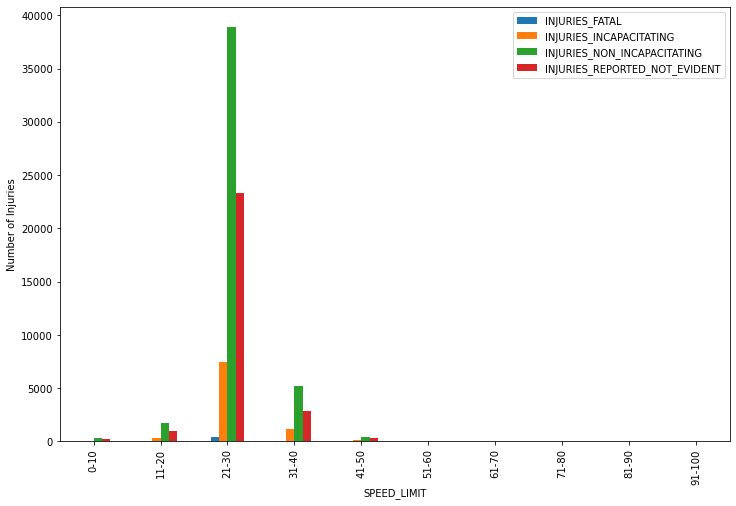

In [22]:
#Considering speed in intervals of 10 
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100']
df['SPEED_LIMIT'] = pd.cut(df['POSTED_SPEED_LIMIT'], bins=bins, labels=labels)

#PLOT
injuries = ['INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT']
inj = df.groupby('SPEED_LIMIT').sum()[injuries]
print(inj.head(10))
inj.plot(xlabel = 'SPEED_LIMIT', ylabel = 'Number of Injuries', kind = 'bar', figsize = (12, 8));


Speed Interval 21-30 has the highest number of injuries in all categories. Also, non-incapacitating injuries are highest in this speed interval.

# 6. Relationship between hit and run crashes and number of fatal injuries?

HIT_AND_RUN_I
N     7.0
Y    82.0
Name: INJURIES_FATAL, dtype: float64

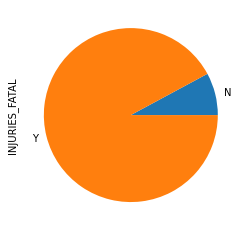

In [23]:
fatal = df.groupby('HIT_AND_RUN_I').sum()['INJURIES_FATAL']
fatal.drop('Not_Available', inplace = True)
fatal.plot(kind='pie');
fatal

The above pie chart shows that there is a relationship between hit and run crashes and number of fatal injuries

# 7. Relation of fatal injuries to intersection-related crashes 

In [24]:
a = df.loc[df['INTERSECTION_RELATED_I'] == 'Y']
b = df.loc[df['NOT_RIGHT_OF_WAY'] == 'Y']
c = df.loc[df['HIT_AND_RUN_I'] == 'Y']
m = a['INJURIES_FATAL'].sum()
n = b['INJURIES_FATAL'].sum()
p = c['INJURIES_FATAL'].sum()

print("Fatal injuries from intersection related crashes:",m)
print("Fatal injuries from not right of way crashes:",n)     
print("Fatal injuries from hit and run crashes:",p)


Fatal injuries from intersection related crashes: 167.0
Fatal injuries from not right of way crashes: 42.0
Fatal injuries from hit and run crashes: 82.0


From the above observation we can say that fatal injuries from intersection relates crashes are infact high when compared to other type of crashes

INTERSECTION_RELATED_I
N     10.0
Y    167.0
Name: INJURIES_FATAL, dtype: float64

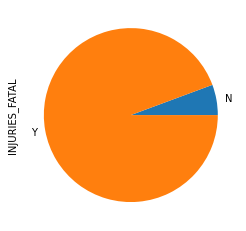

In [25]:
#PLOT
intersection_plot = df.groupby('INTERSECTION_RELATED_I').sum()['INJURIES_FATAL']
intersection_plot.drop('Not_Available', inplace = True)
intersection_plot.plot(kind='pie');
intersection_plot

# 8.a Influence of road surface condtions on number of crashes

ROADWAY_SURFACE_COND
DRY                357579
ICE                  3915
OTHER                1157
SAND, MUD, DIRT       215
SNOW OR SLUSH       20235
UNKNOWN             31860
WET                 66662
dtype: int64

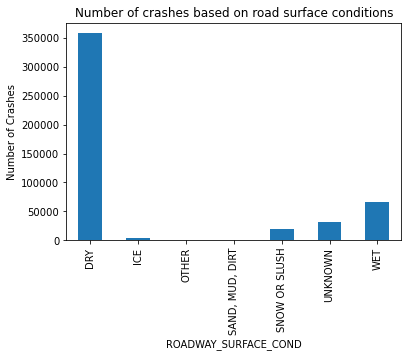

In [26]:
road_cond = df.groupby("ROADWAY_SURFACE_COND").size()
plt.ylabel("Number of Crashes")
plt.title("Number of crashes based on road surface conditions")
road_cond.plot.bar();
road_cond

Highest number of crashes took place on dry surface roadways. Least number of crashes took place on sand,mud and dirt roadways

# 8.b Total injuries for each type of first collision in crash 

In [27]:
df['FIRST_CRASH_TYPE'].value_counts()

REAR END                        115240
PARKED MOTOR VEHICLE            110694
SIDESWIPE SAME DIRECTION         74239
TURNING                          67225
ANGLE                            50894
FIXED OBJECT                     22128
PEDESTRIAN                       11160
SIDESWIPE OPPOSITE DIRECTION      7134
PEDALCYCLIST                      6972
OTHER OBJECT                      4585
HEAD ON                           4108
REAR TO FRONT                     2742
REAR TO SIDE                      1675
OTHER NONCOLLISION                1596
REAR TO REAR                       598
ANIMAL                             332
OVERTURNED                         271
TRAIN                               30
Name: FIRST_CRASH_TYPE, dtype: int64

FIRST_CRASH_TYPE
ANGLE                           16486.0
ANIMAL                             24.0
FIXED OBJECT                     4658.0
HEAD ON                          2015.0
OTHER NONCOLLISION                257.0
OTHER OBJECT                      547.0
OVERTURNED                        161.0
PARKED MOTOR VEHICLE             4131.0
PEDALCYCLIST                     4794.0
PEDESTRIAN                      10243.0
REAR END                        20312.0
REAR TO FRONT                     168.0
REAR TO REAR                       13.0
REAR TO SIDE                      173.0
SIDESWIPE OPPOSITE DIRECTION     1039.0
SIDESWIPE SAME DIRECTION         4737.0
TRAIN                              21.0
TURNING                         14837.0
Name: INJURIES_TOTAL, dtype: float64

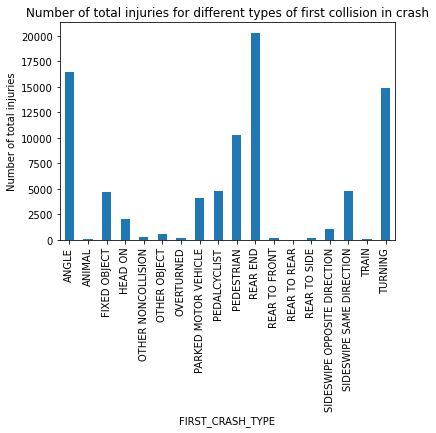

In [28]:
injury = df.groupby('FIRST_CRASH_TYPE').sum()['INJURIES_TOTAL']
plt.ylabel("Number of total injuries")
plt.title("Number of total injuries for different types of first collision in crash")
injury.plot(kind='bar');
injury

From the above observation it is evident that most number of total injuries have occured for rear end first collision in crash and the leaast injuries have occured for rear to rear first collisions